<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pySTALAGMITE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>STALAGMITE</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyTEMPLATE.png"></td>
</tr>
</table>

----
# `pySTALAGMITE`

pySTALAGMITE, a program package prediction the shape of a stalagmite from pre-defined climate conditions.

----
# Path of water
In this notebook, we trace a parcel of water from the **surface** through the **rock**
into a **fracture**.

We will use the library`libCHEM.py` for the reaction constants.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import libCHEM

----
## Water parcel (Stalagmite)
A water droplet seeps through soil enriched with carbon dioxide, dissolves rock along its 
way through the epikarst, arrives supersaturated in the cave, and precipitates calcite.

We consider a droplet 
1. resulting from rain, 
2. seeping through the soil, 
3. flowing through the epikarst,
4. entering a cave void and degassing,
5. precipitating calcite

<img src='images/KARST_PathOfWater.jpg'>

----
We plot the chemical path of the calcium concentration for the droplet:
1. Water from the atmosphere (low CO$_2$, surface temperature, low calcium concentration)
2. Water in the soil (high CO$_2$, surface temperature, low calcium concentration)
3. Water seeping through epikarst (high CO$_2$, surface temperature, dissolving rock, equilibrium calcium concentration)
4. Water entering cavity (low CO$_2$, cave temperature, calcium above equilibrium calcium concentration)
5. Water precipitating calcite (low CO$_2$, cave temperature, equilibrium calcium concentration)

In [2]:
# fill fields for c_{eq} for two temperatures
pco2  = np.arange(400,30000,step=10)
ceq10 = libCHEM.CEQ_limestone_open(10,pco2*1e-6)
ceq20 = libCHEM.CEQ_limestone_open(20,pco2*1e-6)

In [3]:
# points
n = np.array([1,2,3,4,5])
c = np.array([0.,0.,2.07,2.07,0.92])
p = np.array([420,15000,10000,1000,1000])

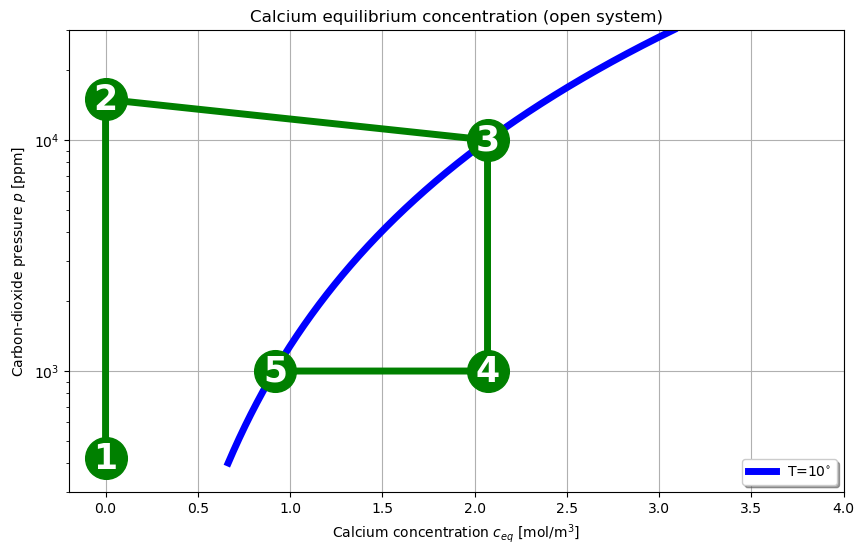

In [4]:
plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([-0.20,4])
plt.ylim([300,30000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq10,pco2,color='blue',linestyle='solid',linewidth=5,label='T=10$^{\circ}$')
plt.plot(c,p,marker='o',markersize=30,linewidth=5,color='green')
for i in range(len(n)):
    plt.text(c[i],p[i],str(n[i]),horizontalalignment='center',verticalalignment='center',
             color='white',weight='bold',fontsize=25)
    plt.grid()
plt.legend(loc='lower right',shadow=True)
plt.savefig('images/CHEM_PATH_Stalagmite.png')

----
## Water parcel (solution pocket)
This time, the water droplet seeps through **barren rock** and enters a cave with higher carbon-dioxide pressure
and/or temperature.

We consider a droplet 
- resulting from rain, 
- flowing through the epikarst,
- entering a cave void.

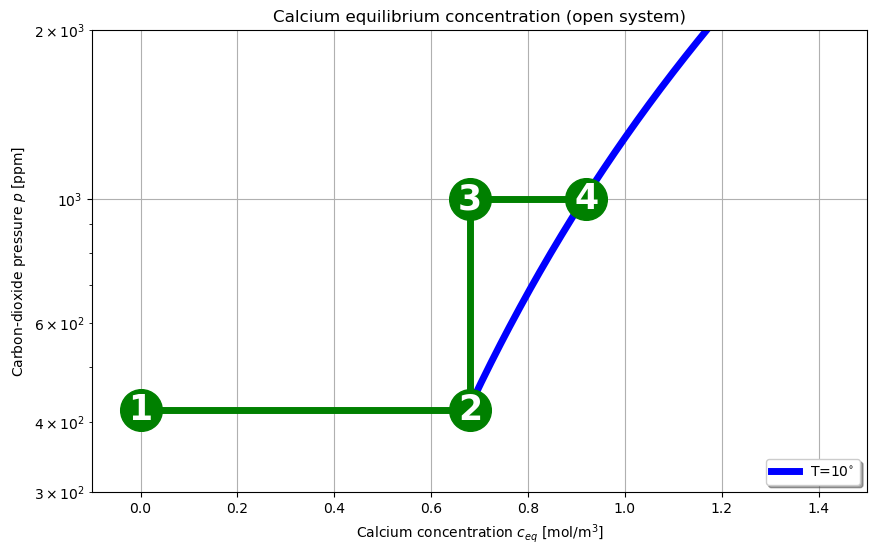

In [8]:
# points
n = np.array([1,2,3,4])
c = np.array([0.,0.68,0.68,0.92])
p = np.array([420,420,1000,1000])

plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([-0.1,1.5])
plt.ylim([300,2000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq10,pco2,color='blue',linestyle='solid',linewidth=5,label='T=10$^{\circ}$')
plt.plot(c,p,marker='o',markersize=30,linewidth=5,color='green')
for i in range(len(n)):
    plt.text(c[i],p[i],str(n[i]),horizontalalignment='center',verticalalignment='center',
             color='white',weight='bold',fontsize=25)
plt.grid()
plt.legend(loc='lower right',shadow=True)
plt.savefig('images/CHEM_PATH_solutionPocket1.png')

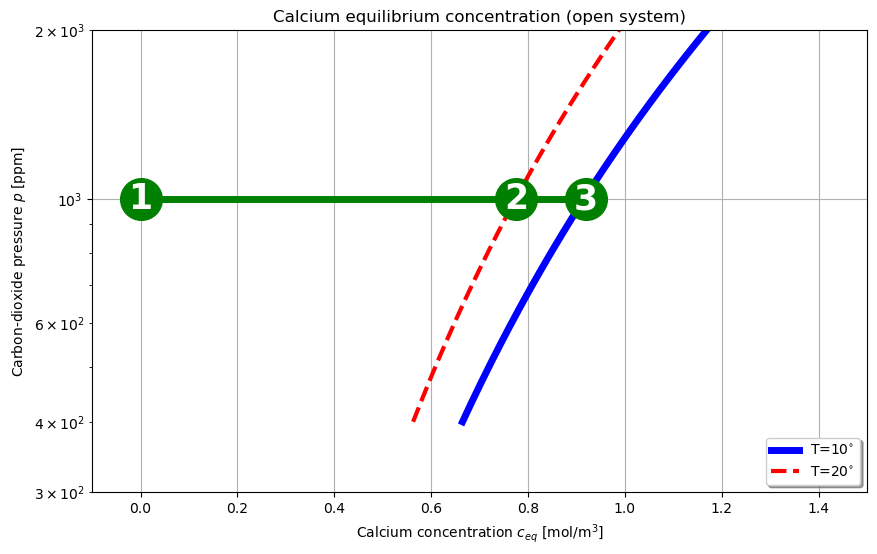

In [9]:
# points
n = np.array([1,2,3])
c = np.array([0.,0.775,0.92])
p = np.array([1000,1000,1000])

plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([-0.1,1.5])
plt.ylim([300,2000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq10,pco2,color='blue',linestyle='solid',linewidth=5,label='T=10$^{\circ}$')
plt.semilogy(ceq20,pco2,color='red',linestyle='dashed',linewidth=3,label='T=20$^{\circ}$')
plt.plot(c,p,marker='o',markersize=30,linewidth=5,color='green')
for i in range(len(n)):
    plt.text(c[i],p[i],str(n[i]),horizontalalignment='center',verticalalignment='center',
             color='white',weight='bold',fontsize=25)
plt.grid()
plt.legend(loc='lower right',shadow=True)
plt.savefig('images/CHEM_PATH_solutionPocket2.png')

----
## Literature

- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO2 + H2O → H+ + HCO3− as one of the rate limiting steps for the dissolution of calcite in the system H2OCO2CaCO3**, Geochim. Cosmochim. Acta, 60(18):3375–3381
- Millero, Graham, Huang, Bustos-Serrano, Pierrot (2006). **Dissociation constants of carbonic acid in seawater as a function of salinity and temperature**,
Marine Chemistry 100(1-2):80-94.
- Schulz, Riebesell, Rost, Toms, Zeebe (2006): **Determination of the rate constants for the carbon dioxide to
bicarbonate inter-conversion in pH-buffered seawater systems**,
Marine Chemistry 100 (2006) 53–65.

----